In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Y_deaths = pd.read_csv("data/yearly_deaths_by_clinic.csv")
Y_deaths.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [4]:
M_deaths = pd.read_csv("data/monthly_deaths.csv")
M_deaths.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [5]:
yearly_deaths = Y_deaths.groupby("year")["deaths"].sum()

In [6]:
highest_year = yearly_deaths.idxmax()

In [7]:
highest_year

1842

In [8]:
Y_deaths["clinic"].unique()

array(['clinic 1', 'clinic 2'], dtype=object)

In [9]:
Y_deaths["proportion_deaths"] = Y_deaths["deaths"]/Y_deaths["births"]

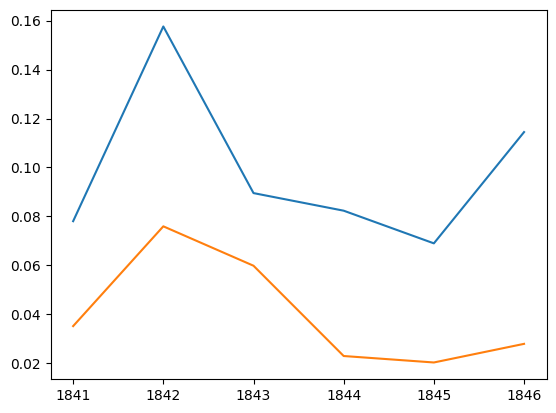

In [10]:
for clinic in Y_deaths['clinic'].unique():
    clinic_data = Y_deaths[Y_deaths['clinic'] == clinic]
    plt.plot(clinic_data['year'], clinic_data['proportion_deaths'], label=clinic)

In [11]:
M_deaths["proportion_deaths"] = M_deaths["deaths"]/M_deaths["births"]

In [12]:
handwashing_start = '1847-06-01'

In [13]:
M_deaths["handwashing_started"] = M_deaths["date"] >= handwashing_start

In [14]:
monthly_summary = M_deaths.groupby('handwashing_started').agg(mean_proportion_deaths
                                                              = ('proportion_deaths','mean')).reset_index()

print(monthly_summary)

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093


In [15]:
before_washing = M_deaths[M_deaths["date"] < handwashing_start]
after_washing = M_deaths[M_deaths["date"] >= handwashing_start]
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]


In [16]:
boot_mean_diff = []

for i in range(5000):
    boot_before = before_proportion.sample(frac = 1, replace = True)
    boot_after = after_proportion.sample(frac = 1, replace = True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

In [17]:
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
print(confidence_interval)

0.025   -0.100485
0.975   -0.067739
dtype: float64
